<a href="https://colab.research.google.com/github/indra622/AIAcademy_SpeechRecognition/blob/main/5thExercise/k2_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nemo+K2 ASR Demo

materials

logits, indexed words, indexed tokens and lexicon from Nemo
Arpa format from n-gram models


# K2 installation

k2 runs stably in torch 1.7.1 in Colab

In [ ]:
!pip install torch==1.7.1
!pip install k2==1.17.dev20220710+cuda10.2.torch1.7.1 -f https://k2-fsa.org/nightly/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 776.8 MB 11 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.0+cu113
    Uninstalling torch-1.12.0+cu113:
      Successfully uninstalled torch-1.12.0+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.13.0+cu113 requires torch==1.12.0, but you have torch 1.7.1 which is incompatible.
torchtext 0.13.0 requires torch==1.12.0, but you have torch 1.7.1 which is incompatible.
torchaudio 0.12.0+cu113 requires torch==1.12.0, but you have torch 1.7.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://k2-fsa.org/nightly/
     |████████████████████████████████| 75.9 MB 91 kB/s 


In [ ]:
import k2, torch

In [ ]:
import k2.version
k2.version.version.main()


k2 version: 1.17
Build type: Release
Git SHA1: 6ccbe9c28f69aa3d897a4bedc7d879fe0ec7f5f3
Git date: Sat Jul 9 19:23:57 2022
Cuda used to build k2: 10.2
cuDNN used to build k2: 8.0.2
Python version used to build k2: 3.7
OS used to build k2: Ubuntu 18.04.6 LTS
CMake version: 3.23.2
GCC version: 7.5.0
CMAKE_CUDA_FLAGS:   -lineinfo --expt-extended-lambda -use_fast_math -Xptxas=-w  --expt-extended-lambda -gencode arch=compute_35,code=sm_35  -lineinfo --expt-extended-lambda -use_fast_math -Xptxas=-w  --expt-extended-lambda -gencode arch=compute_50,code=sm_50  -lineinfo --expt-extended-lambda -use_fast_math -Xptxas=-w  --expt-extended-lambda -gencode arch=compute_60,code=sm_60  -lineinfo --expt-extended-lambda -use_fast_math -Xptxas=-w  --expt-extended-lambda -gencode arch=compute_61,code=sm_61  -lineinfo --expt-extended-lambda -use_fast_math -Xptxas=-w  --expt-extended-lambda -gencode arch=compute_70,code=sm_70  -lineinfo --expt-extended-lambda -use_fast_math -Xptxas=-w  --expt-extended-lambd

# WFSA/WFST Basics

## WFSA creation

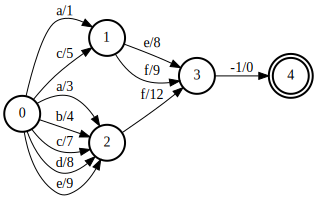

In [ ]:
s = '''
0 1 1 1 
0 1 3 5
0 2 1 3
0 2 2 4
0 2 3 7
0 2 4 8
0 2 5 9
1 3 6 9
1 3 5 8
2 3 6 12
3 4 -1 0
4
'''

a_fsa = k2.Fsa.from_str(s)
sym_str = '''
 <eps> 0
 a 1
 b 2
 c 3
 d 4
 e 5
 f 6
'''
a_fsa.symbols = k2.SymbolTable.from_str(sym_str)
a_fsa.labels_sym = k2.SymbolTable.from_str(sym_str)

a_fsa = k2.arc_sort(a_fsa)
a_fsa.draw('a_fsa.svg')

## WFST creation

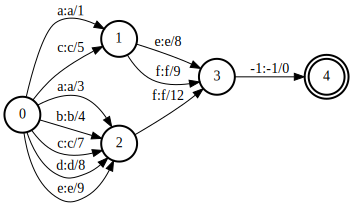

In [ ]:
s = '''
0 1 1 1 1 
0 1 3 3 5
0 2 1 1 3
0 2 2 2 4
0 2 3 3 7
0 2 4 4 8
0 2 5 5 9
1 3 6 6 9
1 3 5 5 8
2 3 6 6 12
3 4 -1 -1 0
4
'''

#a_fsa = k2.Fsa.from_str(s)
a_fst = k2.Fsa.from_str(s, acceptor=False)
sym_str = '''
 <eps> 0
 a 1
 b 2
 c 3
 d 4
 e 5
 f 6
'''
#a_fsa.symbols = k2.SymbolTable.from_str(sym_str)
#a_fsa.labels_sym = k2.SymbolTable.from_str(sym_str)
a_fst.symbols = k2.SymbolTable.from_str(sym_str)
a_fst.labels_sym = k2.SymbolTable.from_str(sym_str)
a_fst.aux_labels_sym = k2.SymbolTable.from_str(sym_str)
a_fst = k2.arc_sort(a_fst)
a_fst.draw('a_fst.svg')

## Composition & Determinization

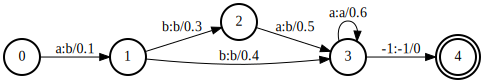

In [ ]:
s = '''
0 1 1 2 0.1
1 2 2 2 0.3
1 3 2 2 0.4
2 3 1 2 0.5
3 3 1 1 0.6
3 4 -1 -1 0
4
'''

#a_fsa = k2.Fsa.from_str(s)
a_fst = k2.Fsa.from_str(s, acceptor=False)
sym_str = '''
 <eps> 0
 a 1
 b 2
 c 3
 d 4
 e 5
 f 6
'''
#a_fsa.symbols = k2.SymbolTable.from_str(sym_str)
#a_fsa.labels_sym = k2.SymbolTable.from_str(sym_str)
a_fst.symbols = k2.SymbolTable.from_str(sym_str)
a_fst.labels_sym = k2.SymbolTable.from_str(sym_str)
a_fst.aux_labels_sym = k2.SymbolTable.from_str(sym_str)
a_fst = k2.arc_sort(a_fst)
a_fst.draw('a_fst.svg')

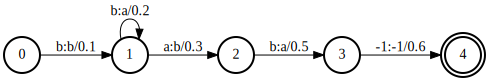

In [ ]:
s = '''
0 1 2 2 0.1
1 1 2 1 0.2
1 2 1 2 0.3
2 3 2 1 0.5
3 4 -1 -1 0.6
4
'''

#a_fsa = k2.Fsa.from_str(s)
b_fst = k2.Fsa.from_str(s, acceptor=False)
sym_str = '''
 <eps> 0
 a 1
 b 2
 c 3
 d 4
 e 5
 f 6
'''
#a_fsa.symbols = k2.SymbolTable.from_str(sym_str)
#a_fsa.labels_sym = k2.SymbolTable.from_str(sym_str)
b_fst.symbols = k2.SymbolTable.from_str(sym_str)
b_fst.labels_sym = k2.SymbolTable.from_str(sym_str)
b_fst.aux_labels_sym = k2.SymbolTable.from_str(sym_str)
b_fst = k2.arc_sort(b_fst)
b_fst.draw('b_fst.svg')

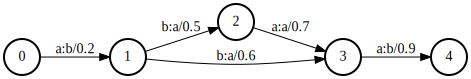

In [ ]:
ab = k2.compose(a_fst, b_fst)
ab.draw('ab_fst.svg')

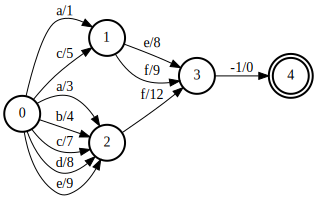

In [ ]:
a_fsa.draw('a_fsa.svg')

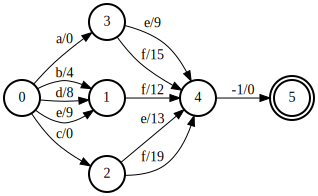

In [ ]:
a_deter = k2.determinize(a_fsa)
a_deter = k2.arc_sort(a_deter)
a_deter.labels_sym = k2.SymbolTable.from_str(sym_str)
a_deter.draw('deter.svg')

# WFST

In [ ]:
words_values = k2.SymbolTable.from_file('lang/lm/words.txt')
tokens_values = k2.SymbolTable.from_file('lang/lm/tokens.txt')

## CTC transducer & Lexicon transducer

In [ ]:
C = k2.ctc_topo(max_token=129, modified=False)

In [ ]:
from utils import read_lexicon

lexicon = read_lexicon("lang/lm/lexicon.txt")

In [ ]:
from utils import add_disambig_symbols

lexicon_disambig, max_disambig = add_disambig_symbols(lexicon)

In [ ]:
max_disambig

1

In [ ]:
tokens_values.add('#0', 128)
tokens_values.add('#1', 129)

print(tokens_values.get('#0'), tokens_values.get('#1'))

128 129


In [ ]:
from utils import lexicon_to_fst

L = lexicon_to_fst(
    lexicon_disambig,
    token2id=tokens_values._sym2id,
    word2id=words_values._sym2id,
    need_self_loops=True
)

## Grammar transducer

In [ ]:
!pip install kaldilm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 2.9 MB/s 
  Created wheel for kaldilm: filename=kaldilm-1.13-cp37-cp37m-linux_x86_64.whl size=890346 sha256=c3bfd8b52240c9898dcf42e99da25575cb76332647e8f6dd9d82bda58ad52b04
  Stored in directory: /root/.cache/pip/wheels/32/e4/e8/793378fe62486e42dd2fbc316b6a9d3a43380bbda7d320a69d
Successfully built kaldilm


In [ ]:
!python3 -m kaldilm --read-symbol-table="lang/lm/words.txt" --disambig-symbol='#0' --max-order=3 lang/lm/libri_3_gram_1e-7.arpa > lang/G.fst.txt

/tmp/pip-install-b3_qq438/kaldilm_e079150f25a9457188497dd1f0dfa553/kaldilm/csrc/arpa_file_parser.cc:void kaldilm::ArpaFileParser::Read(std::istream&):79
[I] Reading \data\ section.
/tmp/pip-install-b3_qq438/kaldilm_e079150f25a9457188497dd1f0dfa553/kaldilm/csrc/arpa_file_parser.cc:void kaldilm::ArpaFileParser::Read(std::istream&):140
[I] Reading \1-grams: section.
/tmp/pip-install-b3_qq438/kaldilm_e079150f25a9457188497dd1f0dfa553/kaldilm/csrc/arpa_file_parser.cc:void kaldilm::ArpaFileParser::Read(std::istream&):140
[I] Reading \2-grams: section.
/tmp/pip-install-b3_qq438/kaldilm_e079150f25a9457188497dd1f0dfa553/kaldilm/csrc/arpa_file_parser.cc:void kaldilm::ArpaFileParser::Read(std::istream&):140
[I] Reading \3-grams: section.


In [ ]:
import torch

with open("lang/G.fst.txt") as f:
  G = k2.Fsa.from_openfst(f.read(), acceptor=False)
  torch.save(G.as_dict(), "lang/G.pt")

## Composition & Determinization

### Composition

In [ ]:
L = k2.arc_sort(L)
G = k2.arc_sort(G)

LG = k2.compose(L, G)
#L_inv = L.invert()
#L_inv = k2.arc_sort(L_inv)
#L_inv.rename_tensor_attribute_('aux_labels', 'left_labels')
#LG = k2.intersect(L_inv, G, treat_epsilons_specially=True)
#LG.rename_tensor_attribute_('left_labels', 'labels')
LG = k2.connect(LG)

print(LG.shape)

(11585797, None)


### Determinization

In [ ]:
LG = k2.determinize(LG)
LG = k2.connect(LG)
print(LG.shape)

(6032481, None)


### Epsilon removal

In [ ]:
LG.labels[LG.labels >= tokens_values["#0"]] = 0
# See https://github.com/k2-fsa/k2/issues/874
# for why we need to set LG.properties to None
LG.__dict__["_properties"] = None

assert isinstance(LG.aux_labels, k2.RaggedTensor)
LG.aux_labels.values[LG.aux_labels.values >= words_values["#0"]] = 0

LG = k2.remove_epsilon(LG)
#logging.info(f"LG shape after k2.remove_epsilon: {LG.shape}")

LG = k2.connect(LG)
LG.aux_labels = LG.aux_labels.remove_values_eq(0)

In [ ]:
print(LG.shape)

(3472138, None)


## CLG composition

In [ ]:
torch.save(LG.as_dict(), "lang/LG.pt")

In [ ]:
C = k2.arc_sort(C)
LG = k2.arc_sort(LG)

In [ ]:
CLG = k2.compose(C, LG)

CLG = k2.connect(CLG)

print(CLG.shape)

(6944399, None)


In [ ]:
torch.save(CLG.as_dict(), 'lang/CLG.pt')

In [ ]:
import k2, torch
CLG = k2.Fsa.from_dict(torch.load('lang/CLG.pt', map_location="cpu"))

## Utterance transducer

In [ ]:
import torch
nnet_outputs = torch.load('logits.pt')

In [ ]:
print(len(nnet_outputs))
print(nnet_outputs[0].shape)

2620
torch.Size([303, 129])


In [ ]:
def rearrange_blksym(nnet_outputs):
    nnet_t = nnet_outputs.T
    tmp = nnet_t[1:-1]
    tmp2 = nnet_t[-1:]
    logits = torch.cat([tmp2, tmp])
    logits = logits.T
    logits = torch.tensor([logits.numpy()])
    
    return logits
    

In [ ]:
logits = rearrange_blksym(nnet_outputs[0])

In [ ]:
logits.shape

torch.Size([1, 303, 128])

In [ ]:
supervision_segments = torch.tensor([[0, 0, logits.shape[1]]], dtype=torch.int32)

In [ ]:
dense_fsa_vec = k2.DenseFsaVec(
    logits,
    supervision_segments)

In [ ]:
lattice = k2.intersect_dense_pruned(CLG, dense_fsa_vec, 30.0, 15, 30, 1000000)

In [ ]:
best_path = k2.shortest_path(lattice, use_double_scores=True)

In [ ]:
from utils import get_texts

token_ids = get_texts(best_path)
hyp = [[words_values[i] for i in ids] for ids in token_ids]
print(" ".join(hyp[0]))

BUT ALREADY AT A POINT IN ECONOMIC EVOLUTION FAR ANTEDATING THE EMERGENCE OF THE LADY SPECIALIZED CONSUMPTION OF GOODS AS AN EVIDENCE OF PECUNIARY STRENGTH HAD BEGUN TO WORK OUT IN A MORE OR LESS ELABORATE SYSTEM


In [ ]:
token_ids

[[122761,
  23446,
  50470,
  1,
  670655,
  419974,
  261938,
  287720,
  296545,
  33780,
  859565,
  270926,
  610141,
  859565,
  481892,
  809870,
  183281,
  610141,
  353265,
  46387,
  28596,
  287512,
  610141,
  644669,
  826186,
  372029,
  77209,
  871452,
  959809,
  624244,
  419974,
  1,
  569138,
  617951,
  496112,
  266604,
  841515]]